In [1]:
import pandas as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_boston

boston = load_boston()

print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/Users/jungjihoon/miniforge3/envs/dl/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Califo

In [5]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['TARGET'] = boston.target
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [7]:
cols = ['TARGET', 'INDUS', 'RM', 'LSTAT', 'NOX', 'DIS']
data = torch.from_numpy(df[cols].values).float() # numpy 형태의 데이터를 가져옴

data.shape

torch.Size([506, 6])

In [9]:
# tensor 형태의 dataset
data

tensor([[24.0000,  2.3100,  6.5750,  4.9800,  0.5380,  4.0900],
        [21.6000,  7.0700,  6.4210,  9.1400,  0.4690,  4.9671],
        [34.7000,  7.0700,  7.1850,  4.0300,  0.4690,  4.9671],
        ...,
        [23.9000, 11.9300,  6.9760,  5.6400,  0.5730,  2.1675],
        [22.0000, 11.9300,  6.7940,  6.4800,  0.5730,  2.3889],
        [11.9000, 11.9300,  6.0300,  7.8800,  0.5730,  2.5050]])

In [10]:
# split x, y
y = data[:,:1]
x = data[:,1:]

print(x.shape, y.shape)

torch.Size([506, 5]) torch.Size([506, 1])


In [11]:
# 하이퍼파라미터
n_epochs = 2000
learning_rate = 1e-3
print_interval = 100

In [12]:
# 모델 수립
model = nn.Linear(x.size(-1), y.size(-1))
model

Linear(in_features=5, out_features=1, bias=True)

In [23]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) 

In [24]:
# 학습 시작
for i in range(n_epochs):
    y_hat = model(x)
    loss = F.mse_loss(y_hat, y)
    
    optimizer.zero_grad()
    loss.backward()
    
    optimizer.step()
    
    if (i+1) % print_interval == 0:
        print('Epoch %d: loss=%.4e' % (i + 1, loss))

Epoch 100: loss=4.6424e+01
Epoch 200: loss=3.8721e+01
Epoch 300: loss=3.4458e+01
Epoch 400: loss=3.2056e+01
Epoch 500: loss=3.0702e+01
Epoch 600: loss=2.9938e+01
Epoch 700: loss=2.9508e+01
Epoch 800: loss=2.9265e+01
Epoch 900: loss=2.9128e+01
Epoch 1000: loss=2.9050e+01
Epoch 1100: loss=2.9006e+01
Epoch 1200: loss=2.8981e+01
Epoch 1300: loss=2.8966e+01
Epoch 1400: loss=2.8958e+01
Epoch 1500: loss=2.8953e+01
Epoch 1600: loss=2.8950e+01
Epoch 1700: loss=2.8948e+01
Epoch 1800: loss=2.8946e+01
Epoch 1900: loss=2.8945e+01
Epoch 2000: loss=2.8944e+01


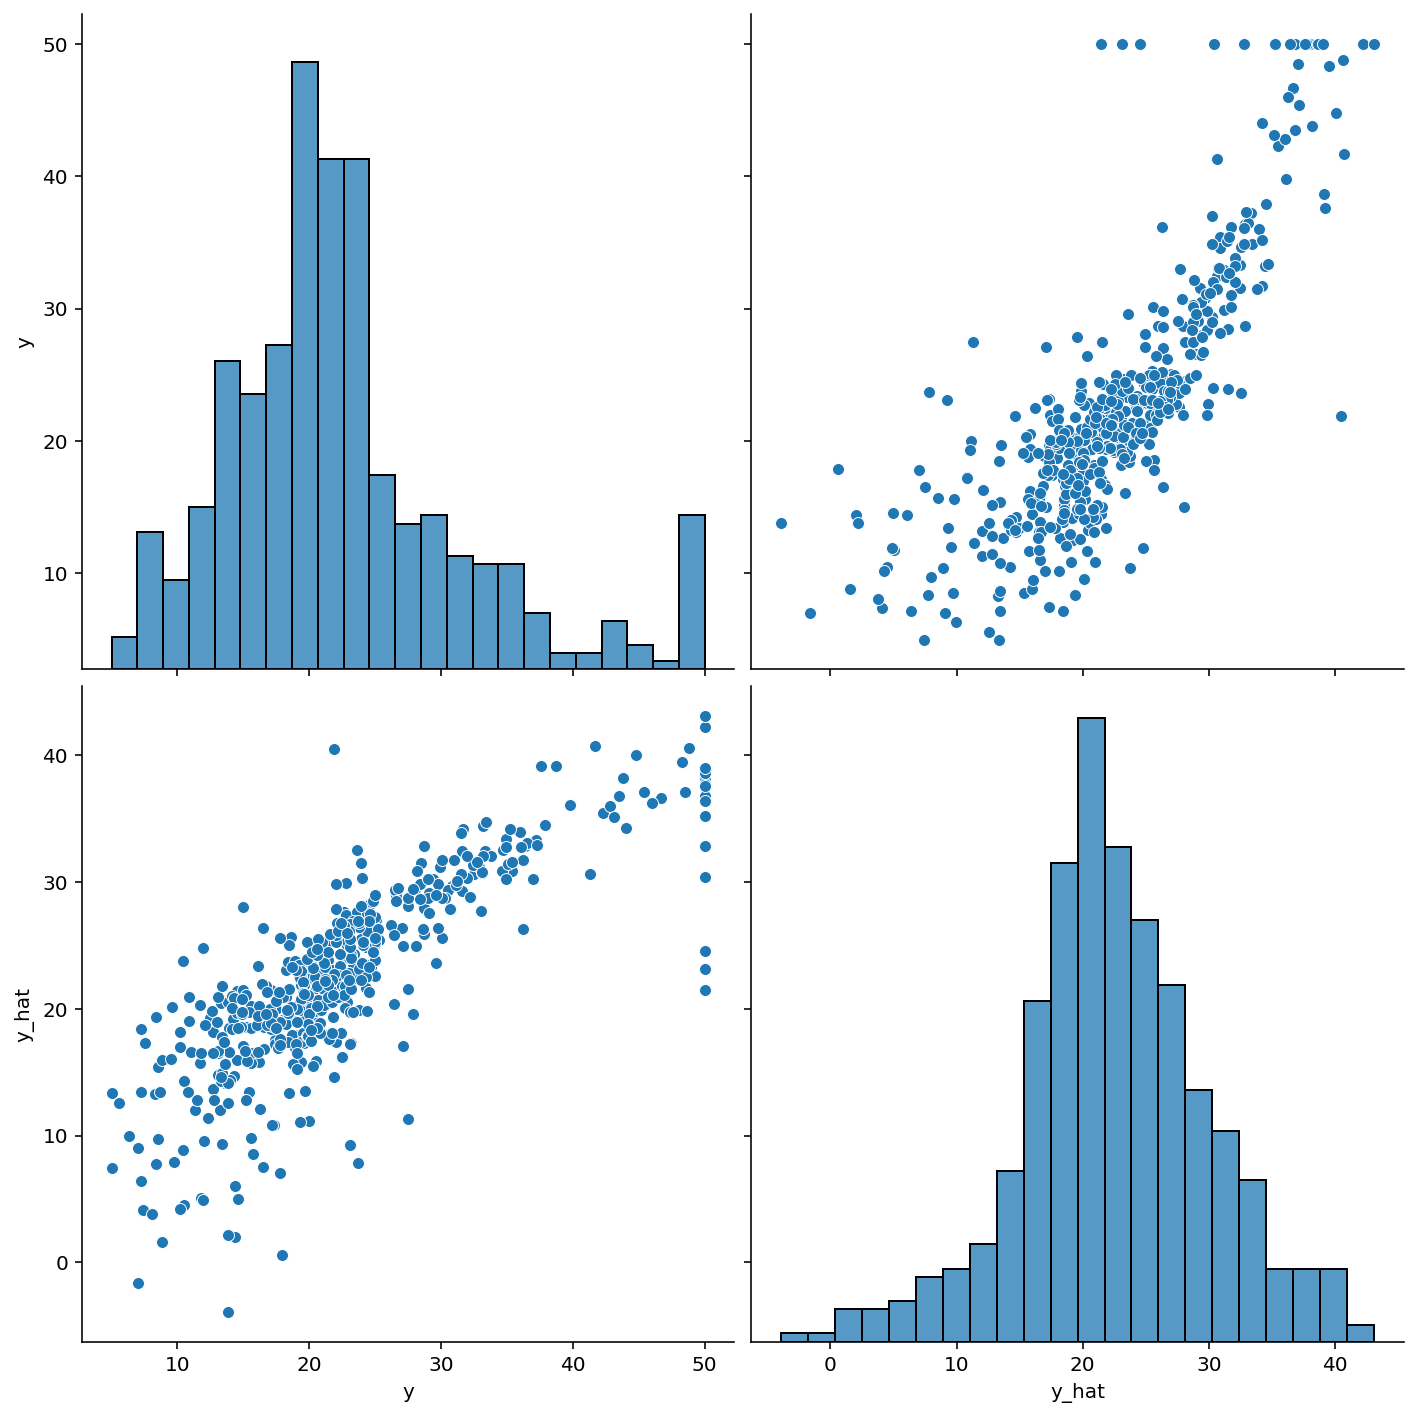

In [25]:
df = pd.DataFrame(torch.cat([y, y_hat], dim=1).detach_().numpy(), columns=['y', 'y_hat'])
sns.pairplot(df, height=5)
plt.show()